In [1]:
import os
import sys
import glob
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.isotonic import IsotonicRegression
import random

In [2]:
dataset_name = 'Combined_Cycle_Power_Plant_Dataset'
n_thresholds = 32
classifier_folder = 'RandomForest_classifier'

In [3]:
split_0_thresholds_real_values = [
 -1.64903713, -1.48213775, -1.34932436, -1.23791729, -1.14045313, -1.0426418,
 -0.95044171, -0.86286024, -0.77755683, -0.69584382, -0.61276514, -0.51563182,
 -0.42969661, -0.33171858, -0.22501316, -0.11824968,  0.0065468,   0.12508521,
  0.2570924,   0.40129147,  0.53294442,  0.62902742,  0.71434348,  0.80378459,
  0.89288096,  0.99337665,  1.08873837,  1.18107694,  1.28890763,  1.38965359,
  1.50629066,  1.64602984
]

split_1_thresholds_real_values = [
 -1.64960359, -1.48552966, -1.35308836, -1.23662492, -1.13665712, -1.03945539,
 -0.9471198,  -0.86014557, -0.77757291, -0.69501119, -0.61111706, -0.51655528,
 -0.43179836, -0.33493871, -0.22613232, -0.1192303,   0.00510153,  0.12844131,
  0.25871129,  0.40069569,  0.53396968,  0.63314237,  0.71578989,  0.80139441,
  0.89219614,  0.99022027,  1.0869545,   1.1769188,   1.28826677,  1.38797967,
  1.505277,    1.6500434 ]

split_2_thresholds_real_values = [
 -1.64670987, -1.48654836, -1.35221934, -1.23790065, -1.13847454, -1.0402835,
 -0.94773873, -0.86129359, -0.77780808, -0.6908546,  -0.6089095,  -0.51349989,
 -0.42727437, -0.32962796, -0.224481,   -0.11920678, 0.00665003,  0.12558284,
  0.25572171,  0.40040973,  0.52899571,  0.62884327,  0.71080179,  0.79324971,
  0.88895699,  0.99123288,  1.08615775, 1.18128634,  1.29202286,  1.3928888,
  1.510493,    1.65051973]

split_3_thresholds_real_values = [
 -1.64694135, -1.48444873, -1.3565369,  -1.24118883, -1.14069584, -1.04146458,
 -0.94935487, -0.86040188, -0.77660388, -0.68796241, -0.60983866, -0.51680937,
 -0.42887094, -0.33477416, -0.22796482, -0.12046255,  0.00868737,  0.12552282,
  0.25766769,  0.41140187,  0.53603764,  0.63119068,  0.71561741,  0.80045896,
  0.88959645,  0.98899203,  1.08307808,  1.17743971,  1.28639724,  1.39041508,
  1.50748267,  1.65085442]

split_4_thresholds_real_values = [
 -1.64482385 ,-1.47784319 ,-1.3481702 , -1.23821142 ,-1.13755266, -1.04268381,
 -0.95110846 ,-0.86485901 ,-0.78084362, -0.69688187 ,-0.61300405, -0.5177782,
 -0.42906755 ,-0.33488296 ,-0.22356994, -0.11982345,  0.01054124,  0.12674226,
  0.25995018,  0.40966932,  0.53530418,  0.6324467,   0.71723984,  0.80090505,
  0.89134063,  0.99000315,  1.0868937 ,  1.17701372,  1.29147579,  1.38847941,
  1.5051769,   1.65173829]

split_5_thresholds_real_values = [
 -1.64203865 ,-1.48255543 ,-1.35279253 ,-1.24042542 ,-1.14053781 ,-1.04416602,
 -0.94894421 ,-0.86497555 ,-0.77890345 ,-0.69366634 ,-0.61199908 ,-0.51422483,
 -0.43098101 ,-0.33366723 ,-0.22382841 ,-0.11902946,  0.00865877,  0.12640966,
  0.26158174,  0.40647876,  0.5339824,   0.62877962,  0.71592913,  0.79984305,
  0.88949705,  0.99358508,  1.08908846,  1.17742734,  1.29117424,  1.3849276,
  1.50921071,  1.64981781]

split_6_thresholds_real_values = [
 -1.64978764, -1.48572307, -1.3516937, -1.23919908, -1.13766539, -1.039713,
 -0.94739273, -0.85898405, -0.77715956, -0.69462015, -0.61074627, -0.51485723,
 -0.42617329, -0.331374, -0.22770651, -0.1235387, 0.00364389, 0.12355166,
  0.25772208, 0.40945725, 0.53618409,  0.6312352, 0.71658136, 0.80178624,
  0.8917375, 0.98994408, 1.09063208, 1.17933816, 1.28753808, 1.38950857,
  1.50563355, 1.65232019]

split_7_thresholds_real_values = [
 -1.655621,   -1.4873162  ,-1.35517286 ,-1.23971156 ,-1.13835427 ,-1.03754064,
 -0.94538326 ,-0.85566113 ,-0.77254201 ,-0.68873818 ,-0.60843387 ,-0.5173218,
 -0.43123296 ,-0.33047721 ,-0.22424303 ,-0.11543186,  0.00896073,  0.12596603,
  0.25602217,  0.39902562,  0.52581155,  0.62710764,  0.71329263,  0.79932701,
  0.88962324,  0.99063202,  1.08602131,  1.17840348,  1.28369985,  1.38950239,
  1.50893534,  1.65848228]

split_8_thresholds_real_values = [
 -1.64688852 ,-1.48483569 ,-1.35132635 ,-1.23792232 ,-1.13869915 ,-1.04223907,
 -0.94620126 ,-0.85935401 ,-0.77264298, -0.6896141  ,-0.60734493 ,-0.51159203,
 -0.42907556 ,-0.33106591 ,-0.22620906 ,-0.12559369,  0.0055466,   0.12412165,
  0.25502825,  0.39817065,  0.52655596,  0.63164132,  0.71526404,  0.79952572,
  0.89492073,  0.99394093,  1.08666186,  1.17779457,  1.29265375,  1.3904384,
  1.50750657,  1.64904808]

split_9_thresholds_real_values = [
 -1.63374073 ,-1.48680494 ,-1.35411495 ,-1.24057255 ,-1.14112419 ,-1.04291243,
 -0.95034939 ,-0.86025897, -0.7753964  ,-0.69132042 ,-0.60940011 ,-0.5140205,
 -0.42782327 ,-0.33345279 ,-0.22636871 ,-0.11924786,  0.00593893,  0.12482047,
  0.25489937,  0.40502659,  0.53365204,  0.6299165,   0.71589109,  0.79917661,
  0.89171335,  0.99094141,  1.08483583,  1.17989198,  1.29053962,  1.39132018,
  1.50797069,  1.65076139]

splits_thresholds_real_values = [
    split_0_thresholds_real_values,
    split_1_thresholds_real_values,
    split_2_thresholds_real_values,
    split_3_thresholds_real_values,
    split_4_thresholds_real_values,
    split_5_thresholds_real_values,
    split_6_thresholds_real_values,
    split_7_thresholds_real_values,
    split_8_thresholds_real_values,
    split_9_thresholds_real_values
]

In [4]:
class isotonic_regression_model():
    def __init__(self):
        super(isotonic_regression_model, self).__init__()
        self.thresholds_real_values = None
        self.n_thresholds = None
        self.values_between_thresholds = None
        
    def fit(self, thresholds_real_values):
        self.thresholds_real_values = thresholds_real_values
        self.n_thresholds = len(thresholds_real_values)
        
        self.values_between_thresholds = []
        for tmp_index in range(len(thresholds_real_values) - 1):
            self.values_between_thresholds.append((thresholds_real_values[tmp_index] + thresholds_real_values[tmp_index + 1]) / 2.0)
    
    def predict(self, X):
        predictions = []
        
        for classifiers_prediction in X:
            isotonic_regression_model = IsotonicRegression().fit(self.thresholds_real_values, classifiers_prediction)
            isotonic_prediction = isotonic_regression_model.predict(self.thresholds_real_values)
        
            differences = []
            for tmp_index in range(self.n_thresholds - 1):
                differences.append(isotonic_prediction[tmp_index + 1] - isotonic_prediction[tmp_index])
                
            weighted_mean = 0
            for yi, Pi in zip(self.values_between_thresholds, differences):
                weighted_mean += Pi * yi
                
            predictions.append(weighted_mean)
        
        return predictions
    
    def predict_largest_diff(self, X):
        predictions = []
        
        for classifiers_prediction in X:
            isotonic_regression_model = IsotonicRegression().fit(self.thresholds_real_values, classifiers_prediction)
            isotonic_prediction = isotonic_regression_model.predict(self.thresholds_real_values)
        
            differences = []
            for tmp_index in range(self.n_thresholds - 1):
                differences.append(isotonic_prediction[tmp_index + 1] - isotonic_prediction[tmp_index])
                
            predictions.append(self.values_between_thresholds[np.argmax(differences)])
        
        return predictions
        
            
    def fit_predict(self, thresholds_real_values, X):
        self.fit(thresholds_real_values)
        return self.predict(X)
        
            
    def fit_predict_largest_diff(self, thresholds_real_values, X):
        self.fit(thresholds_real_values)
        return self.predict_largest_diff(X)

In [5]:
def load_datasets(path, name):
    folds_directories = [f.path for f in os.scandir(path) if name in f.path.split('_')]

    datasets_list = []

    for fold_path in folds_directories:
        datasets_list.append(pd.read_csv(fold_path))
        
    return datasets_list

In [6]:
TRAIN_splits_extracted_features_dataset = load_datasets(os.path.join('..', 'data', 'extracted_features', dataset_name, str(n_thresholds) + '_bins_equal_freq_below_threshold', classifier_folder), 'TRAIN')
TEST_splits_extracted_features_dataset = load_datasets(os.path.join('..', 'data', 'extracted_features', dataset_name, str(n_thresholds) + '_bins_equal_freq_below_threshold', classifier_folder), 'TEST')

In [7]:
custom_model_train_rmses = []
custom_model_test_rmses = []

custom_model_train_rmses_2 = []
custom_model_test_rmses_2 = []

lr_train_rmses = []
lr_test_rmses = []

for i in range(10):
    print("===== Split " + str(i) + " :")
    
    split_i_TRAIN_dataset = TRAIN_splits_extracted_features_dataset[i]
    split_i_TRAIN_thresholds_prediction = []
    for class_col in [e for e in split_i_TRAIN_dataset.columns if 'threshold' in e.split('_') and '1|X)' in e.split('_')]:
        split_i_TRAIN_thresholds_prediction.append(list(split_i_TRAIN_dataset[class_col]))
    split_i_TRAIN_thresholds_prediction = np.array(split_i_TRAIN_thresholds_prediction).T
    
    split_i_TEST_dataset = TEST_splits_extracted_features_dataset[i]
    split_i_TEST_thresholds_prediction = []
    for class_col in [e for e in split_i_TEST_dataset.columns if 'threshold' in e.split('_') and '1|X)' in e.split('_')]:
        split_i_TEST_thresholds_prediction.append(list(split_i_TEST_dataset[class_col]))
    split_i_TEST_thresholds_prediction = np.array(split_i_TEST_thresholds_prediction).T

    custom_model_train_rmses.append(mean_squared_error(list(split_i_TRAIN_dataset['reg_goal_var']),
                                                       isotonic_regression_model().fit_predict(splits_thresholds_real_values[i],
                                                                                               split_i_TRAIN_thresholds_prediction),
                                                       squared=False))
    print("Custom model TRAIN RMSE =      {0:.3f}".format(custom_model_train_rmses[-1]))
    
    custom_model_test_rmses.append(mean_squared_error(list(split_i_TEST_dataset['reg_goal_var']),
                                                       isotonic_regression_model().fit_predict(splits_thresholds_real_values[i],
                                                                                               split_i_TEST_thresholds_prediction),
                                                       squared=False))
    print("Custom model TEST RMSE =       {0:.3f}".format(custom_model_test_rmses[-1]))
    
    
    
    
    
    custom_model_train_rmses_2.append(mean_squared_error(list(split_i_TRAIN_dataset['reg_goal_var']),
                                                       isotonic_regression_model().fit_predict_largest_diff(splits_thresholds_real_values[i],
                                                                                               split_i_TRAIN_thresholds_prediction),
                                                       squared=False))
    print("Custom model TRAIN RMSE 2 =    {0:.3f}".format(custom_model_train_rmses_2[-1]))
    
    custom_model_test_rmses_2.append(mean_squared_error(list(split_i_TEST_dataset['reg_goal_var']),
                                                       isotonic_regression_model().fit_predict_largest_diff(splits_thresholds_real_values[i],
                                                                                               split_i_TEST_thresholds_prediction),
                                                       squared=False))
    print("Custom model TEST RMSE 2 =     {0:.3f}".format(custom_model_test_rmses_2[-1]))
    
    
    
    

    lr_model = LinearRegression().fit(split_i_TRAIN_thresholds_prediction, split_i_TRAIN_dataset['reg_goal_var'])
    
    lr_train_rmses.append(mean_squared_error(list(split_i_TRAIN_dataset['reg_goal_var']),
                                             lr_model.predict(split_i_TRAIN_thresholds_prediction),
                                             squared=False))
    
    lr_test_rmses.append(mean_squared_error(list(split_i_TEST_dataset['reg_goal_var']),
                                             lr_model.predict(split_i_TEST_thresholds_prediction),
                                             squared=False))
    
    
    
    
    
    print("Linear regression TRAIN RMSE = {0:.3f}".format(lr_train_rmses[-1]))

    print("Linear regression TEST RMSE =  {0:.3f}".format(lr_test_rmses[-1]))
    
print('\n================\n')
print("Custom model mean normal train rmse :       {0:.3f}".format(np.mean(custom_model_train_rmses)))
print("Custom model mean normal test rmse :        {0:.3f}".format(np.mean(custom_model_test_rmses)))
print("Custom model mean largest diff train rmse : {0:.3f}".format(np.mean(custom_model_train_rmses_2)))
print("Custom model mean largest diff test rmse :  {0:.3f}".format(np.mean(custom_model_test_rmses_2)))
print("Linear regression mean train rmse :         {0:.3f}".format(np.mean(lr_train_rmses)))
print("Linear regression mean test rmse :          {0:.3f}".format(np.mean(lr_test_rmses)))

===== Split 0 :
Custom model TRAIN RMSE =      0.398
Custom model TEST RMSE =       0.382
Custom model TRAIN RMSE 2 =    0.171
Custom model TEST RMSE 2 =     0.233
Linear regression TRAIN RMSE = 0.077
Linear regression TEST RMSE =  0.189
===== Split 1 :
Custom model TRAIN RMSE =      0.396
Custom model TEST RMSE =       0.369
Custom model TRAIN RMSE 2 =    0.163
Custom model TEST RMSE 2 =     0.241
Linear regression TRAIN RMSE = 0.076
Linear regression TEST RMSE =  0.211
===== Split 2 :
Custom model TRAIN RMSE =      0.398
Custom model TEST RMSE =       0.413
Custom model TRAIN RMSE 2 =    0.164
Custom model TEST RMSE 2 =     0.252
Linear regression TRAIN RMSE = 0.077
Linear regression TEST RMSE =  0.188
===== Split 3 :
Custom model TRAIN RMSE =      0.398
Custom model TEST RMSE =       0.375
Custom model TRAIN RMSE 2 =    0.138
Custom model TEST RMSE 2 =     0.240
Linear regression TRAIN RMSE = 0.076
Linear regression TEST RMSE =  0.216
===== Split 4 :
Custom model TRAIN RMSE =      0

In [8]:
test_hundred_dataset = load_datasets(os.path.join('..', 'data', 'extracted_features', dataset_name, '100_bins_equal_freq_below_threshold', classifier_folder), 'TRAIN')[0]

In [9]:
test_hundred_thresholds_classifiers_prediction = []
for class_col in [e for e in test_hundred_dataset.columns if 'threshold' in e.split('_') and '1|X)' in e.split('_')]:
    test_hundred_thresholds_classifiers_prediction.append(list(test_hundred_dataset[class_col]))
test_hundred_thresholds_classifiers_prediction = np.array(test_hundred_thresholds_classifiers_prediction).T

In [10]:
test_hundred_thresholds_classifiers_prediction.shape

(8611, 100)

In [11]:
hundred_thresholds_real_values = [
 -1.86602464, -1.73423924, -1.65525863, -1.5779327 , -1.53762595, -1.49018475,
 -1.44155526, -1.39909078, -1.36183035, -1.3208492 , -1.28735673, -1.25014845,
 -1.21400598, -1.17968553, -1.14560716, -1.11790291, -1.08578162, -1.05463101,
 -1.01766592, -0.98919458, -0.96163475, -0.93128059, -0.90772346, -0.87479286,
 -0.84281393, -0.81608902, -0.79309702, -0.76237722, -0.73539557, -0.70856816,
 -0.67909449, -0.64702561, -0.62208107, -0.59589487, -0.55961665, -0.53445747,
 -0.50269442, -0.47717234, -0.44779584, -0.41860565, -0.38828566, -0.35555504,
 -0.32435246, -0.28757437, -0.25236617, -0.22249391, -0.18904269, -0.15833469,
 -0.12163496, -0.08216057, -0.03208623,  0.00721246,  0.0437805 ,  0.0841937,
  0.11720099,  0.15986201,  0.20038612,  0.24339462,  0.28598557,  0.3376702,
  0.3870928 ,  0.43432097,  0.46913608,  0.51762441,  0.55814877,  0.582492,
  0.61770258,  0.64898991,  0.67540469,  0.70499054,  0.73589891,  0.76228562,
  0.78901125,  0.8175661 ,  0.84444048,  0.87853151,  0.90697468,  0.93474014,
  0.97388097,  1.00407125,  1.03546531,  1.06615274,  1.10034738,  1.12870493,
  1.16054743,  1.18575324,  1.21488953,  1.26179685,  1.29795959,  1.33226062,
  1.3649621 ,  1.39371289,  1.43194568,  1.47024384,  1.51176321,  1.55827442,
  1.59992173,  1.65701456,  1.72788622,  1.81627275
]

In [12]:
hundred_thresholds_prediction = isotonic_regression_model().fit_predict(hundred_thresholds_real_values,
                                                           test_hundred_thresholds_classifiers_prediction)
print("Custom model TRAIN RMSE =      {0:.3f}".format(mean_squared_error(list(test_hundred_dataset['reg_goal_var']),
                                                                         hundred_thresholds_prediction,
                                                                         squared=False)))

Custom model TRAIN RMSE =      0.241


In [13]:
values_between_thresholds = []
for tmp_index in range(len(hundred_thresholds_real_values) - 1):
    values_between_thresholds.append((hundred_thresholds_real_values[tmp_index] + hundred_thresholds_real_values[tmp_index + 1]) / 2.0)

index = 8323
real Y value :   0.752
predicted mean : 0.749 (diff = 0.003)
Largest diff :   0.736 (diff = 0.016)


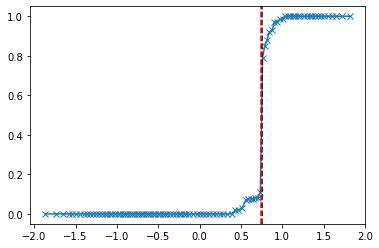

In [14]:
rand_index = random.randint(0, len(test_hundred_thresholds_classifiers_prediction))
print('index =', rand_index)

y0 = test_hundred_thresholds_classifiers_prediction[rand_index]

model = IsotonicRegression().fit(hundred_thresholds_real_values, y0)

model_prediction_for_all_the_thresholds = model.predict(hundred_thresholds_real_values)

differences = []
for tmp_index in range(len(model_prediction_for_all_the_thresholds) - 1):
    differences.append(model_prediction_for_all_the_thresholds[tmp_index + 1] - model_prediction_for_all_the_thresholds[tmp_index])

custom_prediction = np.sum([e1 * e2 for e1, e2 in zip(values_between_thresholds, differences)]) / sum(differences)
    
print('real Y value :   {0:.3f}'.format(test_hundred_dataset.iloc[rand_index]['reg_goal_var']))

print('predicted mean : {0:.3f}'.format(custom_prediction), '(diff = {0:.3f})'.format(np.abs(custom_prediction - test_hundred_dataset.iloc[rand_index]['reg_goal_var'])))
print('Largest diff :   {0:.3f}'.format(hundred_thresholds_real_values[np.argmax(differences)]), '(diff = {0:.3f})'.format(np.abs(hundred_thresholds_real_values[np.argmax(differences)] - test_hundred_dataset.iloc[rand_index]['reg_goal_var'])))

plt.plot(hundred_thresholds_real_values, model_prediction_for_all_the_thresholds, marker='x')
plt.axvline(x=test_hundred_dataset.iloc[rand_index]['reg_goal_var'], color='k', linestyle='--')
plt.axvline(x=custom_prediction, color='r', linestyle='--')

<AxesSubplot:xlabel='x', ylabel='y'>

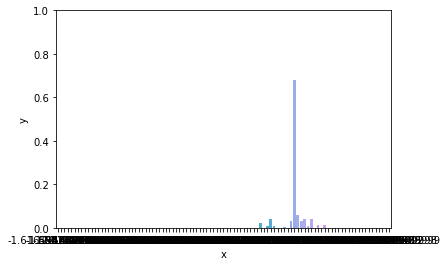

In [15]:
fig, (axes) = plt.subplots(1, 1) #, figsize=(10, 10)
axes.set_ylim([0, 1])
sns.barplot(x='x', y='y', data = pd.DataFrame({'x': values_between_thresholds, 'y': differences}))

predicted mean : 0.749371
real Y value :   0.752


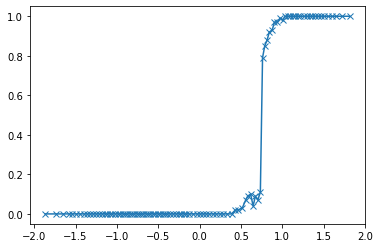

In [16]:
differences = []
for tmp_index in range(len(y0) - 1):
    differences.append(y0[tmp_index + 1] - y0[tmp_index])

custom_prediction = np.sum([e1 * e2 for e1, e2 in zip(values_between_thresholds, differences)]) / sum(differences)
    
print('predicted mean : {0:.6f}'.format(custom_prediction))

print('real Y value :   {0:.3f}'.format(test_hundred_dataset.iloc[rand_index]['reg_goal_var'])) 

plt.plot(hundred_thresholds_real_values, y0, marker='x')

In [17]:
custom_predictions = []
largest_diff_predictions = []

for classfiers_predictions in test_hundred_thresholds_classifiers_prediction:
    model = IsotonicRegression().fit(hundred_thresholds_real_values, classfiers_predictions)

    model_prediction_for_all_the_thresholds = model.predict(hundred_thresholds_real_values)

    differences = []
    for tmp_index in range(len(model_prediction_for_all_the_thresholds) - 1):
        differences.append(model_prediction_for_all_the_thresholds[tmp_index + 1] - model_prediction_for_all_the_thresholds[tmp_index])

    custom_prediction = np.sum([e1 * e2 for e1, e2 in zip(values_between_thresholds, differences)])
    
    custom_predictions.append(custom_prediction)
    
    largest_diff_predictions.append(hundred_thresholds_real_values[np.argmax(differences)])

In [18]:
np.mean(np.abs(custom_predictions - test_hundred_dataset['reg_goal_var']))

0.08515731531013027

In [22]:
np.mean(np.abs(largest_diff_predictions - test_hundred_dataset['reg_goal_var']))

0.024430474207409132

In [19]:
np.sqrt(np.sum([(e1 - e2)**2 for e1, e2 in zip(custom_predictions, test_hundred_dataset['reg_goal_var'])]) / len(custom_predictions))

0.24101679633607798

In [20]:
mean_squared_error(test_hundred_dataset['reg_goal_var'],
                   custom_predictions,
                   squared=False)

0.24101679633607798

In [21]:
mean_squared_error(test_hundred_dataset['reg_goal_var'],
                   largest_diff_predictions,
                   squared=False)

0.06789235246877269